In [1]:
import os

# Set your API token directly
os.environ['KAGGLE_API_TOKEN'] = 'KGAT_83743bcb6fcf67fe73c4f50fc792acf2'
os.environ['KAGGLE_USERNAME'] = 'exploreeverything' # Optional: sometimes needed if the token doesn't auto-detect

# Install the latest version of the Kaggle library to ensure it reads the token correctly
!pip install -q -U kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.3/159.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 10.2 MB/s eta 0:00:00


In [2]:
# Download the dataset
!kaggle datasets download -d salader/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
100% 1.06G/1.06G [00:53<00:00, 19.2MB/s]
100% 1.06G/1.06G [00:53<00:00, 21.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('dogsvscats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Now, let's make a Deep Learning Project on Image Classification ##

Let install important dependencies -

**Conv2D & MaxPooling2D:** These handle the image features (eyes, ears, edges).

**Flatten:** This converts the 2D image data into a long 1D list so the final layers can read it.

**Dense:** The standard neurons that make the final decision (Cat vs Dog).

**BatchNormalization & Dropout:** These help prevent the model from "memorizing" the data (overfitting), which is crucial for this dataset.

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, Flatten, Dense, BatchNormalization, MaxPooling2D, Dropout

In [5]:
# Loading datasets

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
    )

test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalisation

In [6]:
def normal(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(normal)
test_ds = test_ds.map(normal)

Create a CNN Model

In [9]:
from tensorflow.keras import layers

data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid')) # FINAL LAYER - STOP HERE!


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mf = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 91ms/step - accuracy: 0.5412 - loss: 1.8143 - val_accuracy: 0.5970 - val_loss: 0.6534
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 85ms/step - accuracy: 0.6205 - loss: 0.6503 - val_accuracy: 0.6442 - val_loss: 0.6157
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.7022 - loss: 0.5765 - val_accuracy: 0.7230 - val_loss: 0.5400
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7539 - loss: 0.5059 - val_accuracy: 0.6558 - val_loss: 0.5870
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.7963 - loss: 0.4474 - val_accuracy: 0.7290 - val_loss: 0.5282
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.8182 - loss: 0.3940 - val_accuracy: 0.7848 - val_loss: 0.4669
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 85ms/step - accuracy: 0.8476 - loss: 0.3292 - val_accuracy: 0.8186 - val_loss: 0.4069
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.8901 - loss: 0.2526 - 

We have got Accuracy - **94.40 %** and val_Accuracy **80.34 %** ☺

In [11]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,406,469 (85.47 MB)

 Trainable params: 7,468,673 (28.49 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 14,937,348 (56.98 MB)

Now we plot the graphs of trained model

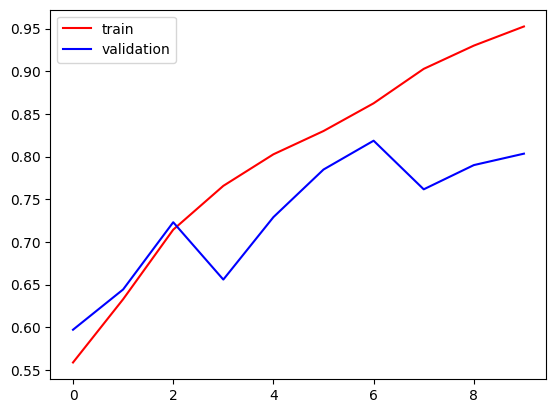

In [12]:
import matplotlib.pyplot as plt

plt.plot(mf.history['accuracy'], color='red', label='train')
plt.plot(mf.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

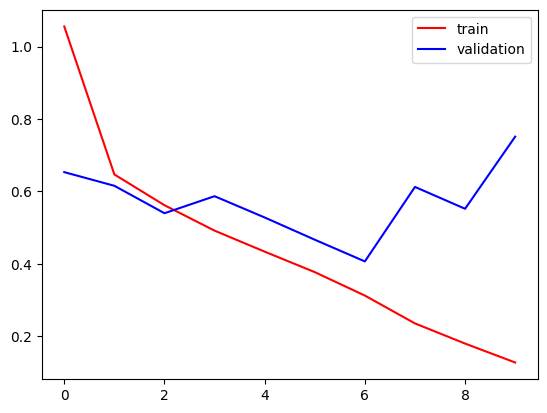

In [13]:
import matplotlib.pyplot as plt

plt.plot(mf.history['loss'], color='red', label='train')
plt.plot(mf.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

Now, We'll check from images that are downloaded from the Web

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
--- Prediction Result ---
Prediction: CAT (Label 0) | Confidence: 0.9408


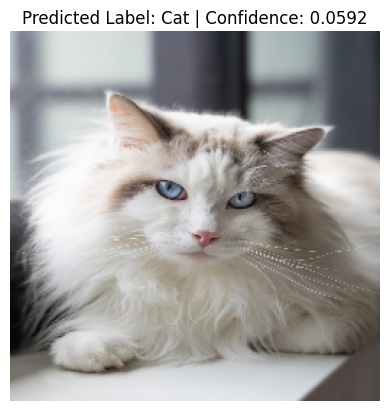

In [16]:
import cv2

# For image-1

img1 = cv2.imread('/content/Sample Images/cutest-cat-breeds-ragdoll-663a8c6d52172-1274048340.jpg')

test_image_bgr = cv2.resize(img1, (256, 256))

rgb_image = cv2.cvtColor(test_image_bgr, cv2.COLOR_BGR2RGB)

test_input = rgb_image.reshape(1, 256, 256, 3) / 255.0

prediction = model.predict(test_input)
confidence = prediction[0][0]

print("--- Prediction Result ---")
if confidence > 0.5:
    print(f"Prediction: DOG (Label 1) | Confidence: {confidence:.4f}")
else:
    # If the output is < 0.5, it's CAT (Label 0)
    print(f"Prediction: CAT (Label 0) | Confidence: {1 - confidence:.4f}")

plt.imshow(rgb_image)
plt.title(f"Predicted Label: {'Dog' if confidence > 0.5 else 'Cat'} | Confidence: {confidence:.4f}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
--- Prediction Result ---
Prediction: DOG (Label 1) | Confidence: 0.9040


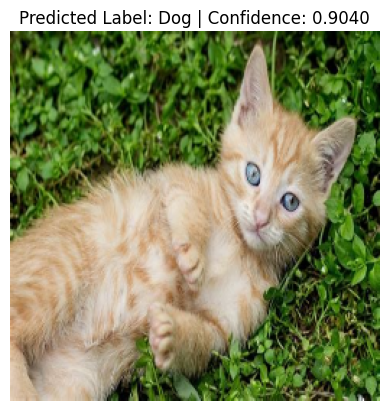

In [17]:
# For image-2

img2 = cv2.imread('/content/Sample Images/OIP-3340050515.png')

test_image_bgr = cv2.resize(img2, (256, 256))

rgb_image = cv2.cvtColor(test_image_bgr, cv2.COLOR_BGR2RGB)

test_input = rgb_image.reshape(1, 256, 256, 3) / 255.0

prediction = model.predict(test_input)
confidence = prediction[0][0]

print("--- Prediction Result ---")
if confidence > 0.5:
    print(f"Prediction: DOG (Label 1) | Confidence: {confidence:.4f}")
else:
    # If the output is < 0.5, it's CAT (Label 0)
    print(f"Prediction: CAT (Label 0) | Confidence: {1 - confidence:.4f}")

plt.imshow(rgb_image)
plt.title(f"Predicted Label: {'Dog' if confidence > 0.5 else 'Cat'} | Confidence: {confidence:.4f}")
plt.axis('off')
plt.show()

I know you are confused about this image and thinking "Why ? is this model this that the above image is DOG".

The above images contain grass too. We know that the kittens are mostly are appeared on only inside the home that's the reason this model
 is so Accurate that it predicting too much acuurate because of OVER FITTING. So that i have solved this problem some how level.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
--- Prediction Result ---
Prediction: DOG (Label 1) | Confidence: 0.9462


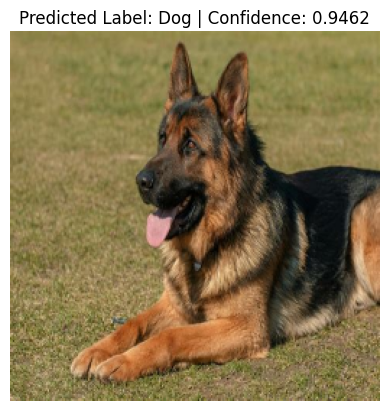

In [19]:
# For image-3

img3 = cv2.imread('/content/Sample Images/OIP-490482029.jpg')

test_image_bgr = cv2.resize(img3, (256, 256))

rgb_image = cv2.cvtColor(test_image_bgr, cv2.COLOR_BGR2RGB)

test_input = rgb_image.reshape(1, 256, 256, 3) / 255.0

prediction = model.predict(test_input)
confidence = prediction[0][0]

print("--- Prediction Result ---")
if confidence > 0.5:
    print(f"Prediction: DOG (Label 1) | Confidence: {confidence:.4f}")
else:
    # If the output is < 0.5, it's CAT (Label 0)
    print(f"Prediction: CAT (Label 0) | Confidence: {1 - confidence:.4f}")

plt.imshow(rgb_image)
plt.title(f"Predicted Label: {'Dog' if confidence > 0.5 else 'Cat'} | Confidence: {confidence:.4f}")
plt.axis('off')
plt.show()

Now, see carefully that the above image the dog is taking rest in the grass thats why the prediction confidance is so HIGH.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
--- Prediction Result ---
Prediction: DOG (Label 1) | Confidence: 0.9736


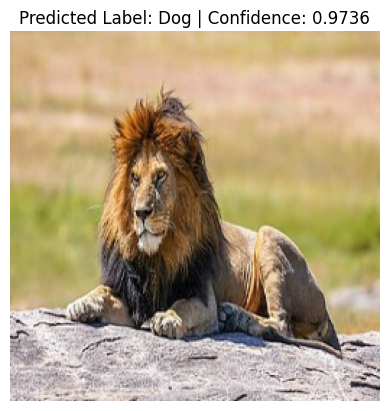

In [20]:
# For image-4

img4 = cv2.imread('/content/Sample Images/081223744512cff3.jpg')

test_image_bgr = cv2.resize(img4, (256, 256))

rgb_image = cv2.cvtColor(test_image_bgr, cv2.COLOR_BGR2RGB)

test_input = rgb_image.reshape(1, 256, 256, 3) / 255.0

prediction = model.predict(test_input)
confidence = prediction[0][0]

print("--- Prediction Result ---")
if confidence > 0.5:
    print(f"Prediction: DOG (Label 1) | Confidence: {confidence:.4f}")
else:
    # If the output is < 0.5, it's CAT (Label 0)
    print(f"Prediction: CAT (Label 0) | Confidence: {1 - confidence:.4f}")

plt.imshow(rgb_image)
plt.title(f"Predicted Label: {'Dog' if confidence > 0.5 else 'Cat'} | Confidence: {confidence:.4f}")
plt.axis('off')
plt.show()

When presented with a noble, gold-maned creature of significant size, I performed a highly optimized binary triage:Is it small, sleek, and generally plotting my downfall from a windowsill? (CAT $\rightarrow$ Label 0)Is it large, potentially requires walking, and often seen on grass?

**Conclusion:** It was seen on grass (The Green Grass Bias!) and possessed non-house-cat dimensions. Therefore, DOG.

### END ###